In [ ]:
!nvidia-smi

Mon Jul 14 01:28:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Completely remove cached builds
!pip uninstall -y ultralytics
!pip install -U --force-reinstall --no-cache-dir git+https://github.com/ultralytics/ultralytics.git



Found existing installation: ultralytics 8.3.166
Uninstalling ultralytics-8.3.166:
  Successfully uninstalled ultralytics-8.3.166
  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-m72etyvj
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-m72etyvj
  Resolved https://github.com/ultralytics/ultralytics.git to commit 29cf67de2feb011a8cecf592bd26d59c332e2d37
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 147.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 282.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 342.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 290.3 MB/s eta 0:00:00
   

In [5]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.7.1+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 45.3/112.6 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
# prompt: I have a image dataset consistingof yaml file in zip format in google drive, I wanna extract that dataset, then see some random images from train

from google.colab import drive
import zipfile
import os

# Define the path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/datasets/eco_detect.zip' # <--- Change this to your actual file path

# Define the extraction path
extraction_path = '/content/dataset'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Dataset extracted to: {extraction_path}")

Dataset extracted to: /content/dataset



Displaying 5 random images from the training set:


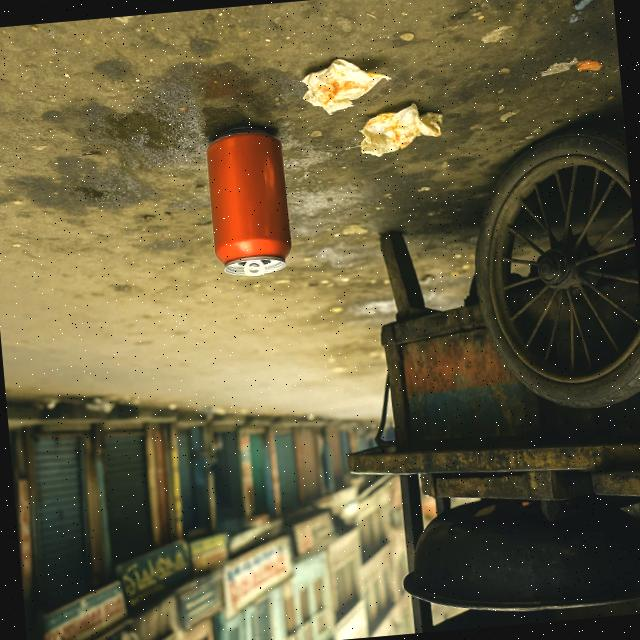

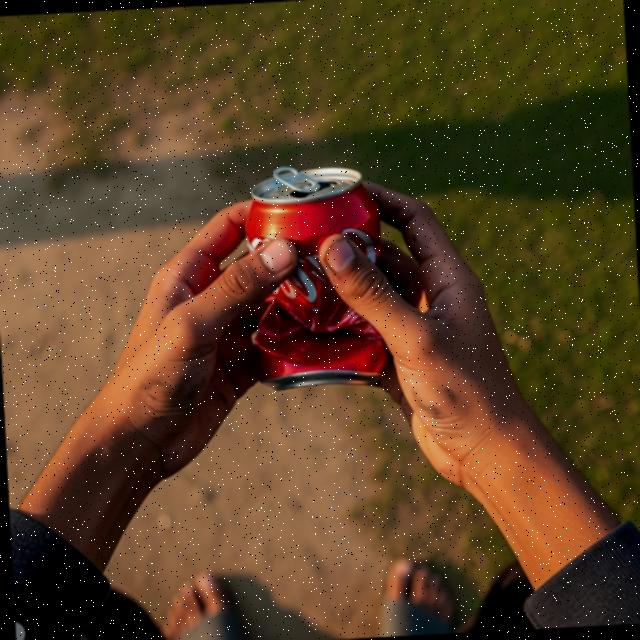

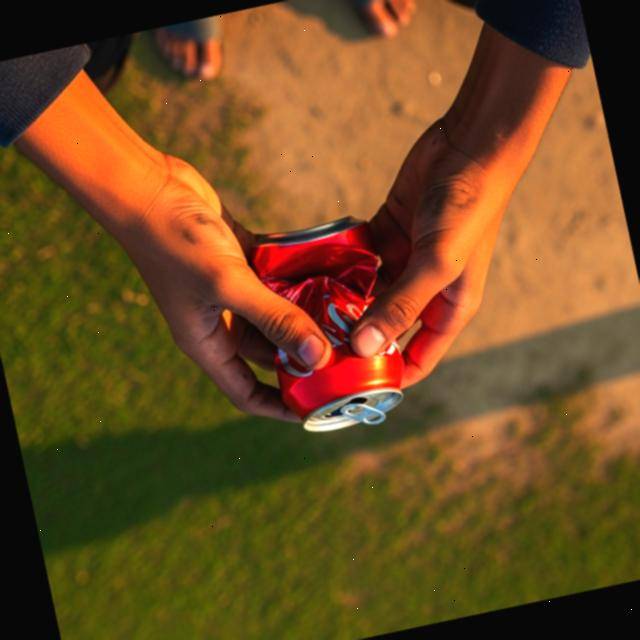

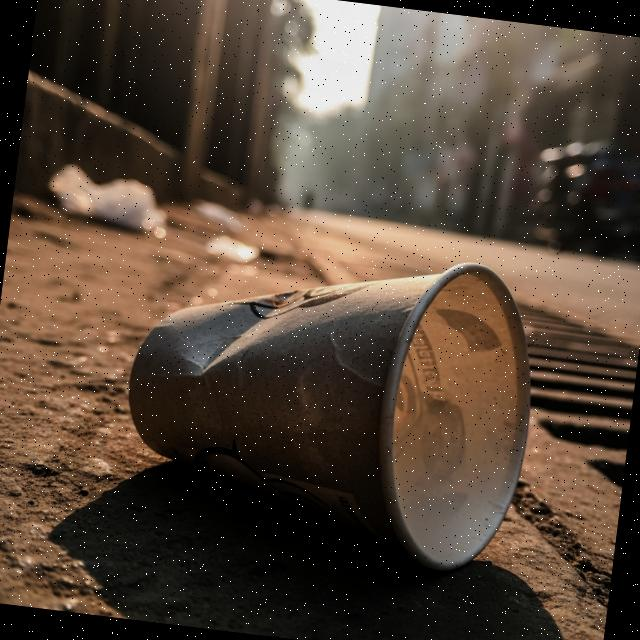

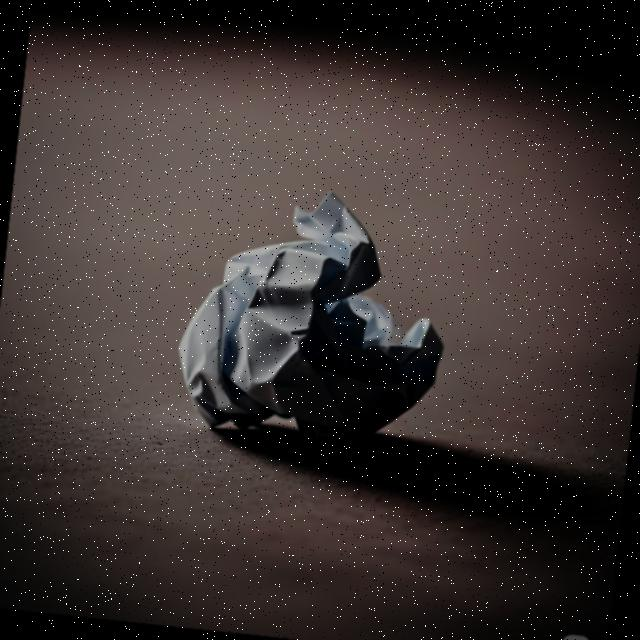

In [8]:
# Define the path to the train image directory (adjust based on your dataset structure)
train_image_dir = os.path.join(extraction_path, 'train', 'images') # <--- Adjust this path

# Get a list of image files in the train directory
image_files = [f for f in os.listdir(train_image_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.webp'))]

# Display a few random images
import random

# Display a few random images horizontally with a specified size
num_images_to_display = 5 # Change this to the number of images you want to display
resized_width = 200 # Set the desired width
resized_height = 200 # Set the desired height

if image_files:
    random_images = random.sample(image_files, min(num_images_to_display, len(image_files)))
    print(f"\nDisplaying {len(random_images)} random images from the training set:")
    for img_file in random_images:
        img_path = os.path.join(train_image_dir, img_file)
        # Ensure that display is imported from IPython.display
        display(Image(filename=img_path, width=resized_width, height=resized_height))
else:
    print(f"No image files found in {train_image_dir}")

In [11]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 356MB/s]


In [12]:
model.train(
    data="/content/dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,           # you can try 32, but 16 is safe for T4
    device=0,           # 0 means GPU; leave it like this
    workers=2,
    project="EcoDetect",
    name="yolov8n_augmented_run",
    exist_ok=True
)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.7.1+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_augmented_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 58.5MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 22                  -1  1    378880  ultralytics.nn.modules.block.C3k2            [384, 256, 1, True]           
 23        [16, 19, 22]  1    431257  ultralytics.nn.modules.head.Detect           [3, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,425 parameters, 2,590,409 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2091.0±802.6 MB/s, size: 86.3 KB)


train: Scanning /content/dataset/train/labels... 1750 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1750/1750 [00:00<00:00, 2306.86it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 826.9±673.6 MB/s, size: 80.4 KB)


val: Scanning /content/dataset/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 1789.36it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to EcoDetect/yolov8n_augmented_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to EcoDetect/yolov8n_augmented_run
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.38G      1.397      2.555      1.409         18        640: 100%|██████████| 110/110 [00:38<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

                   all         75        354      0.551      0.478      0.494      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.78G      1.369      1.863      1.403         42        640: 100%|██████████| 110/110 [00:34<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         75        354      0.542      0.491      0.481      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.79G      1.399      1.773      1.419         42        640: 100%|██████████| 110/110 [00:33<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         75        354      0.559      0.622        0.6      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.81G      1.395      1.657      1.408         43        640: 100%|██████████| 110/110 [00:34<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         75        354       0.69       0.65      0.686      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.82G      1.373      1.551      1.397         24        640: 100%|██████████| 110/110 [00:33<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         75        354      0.572      0.602      0.559      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.84G      1.334      1.495      1.371         19        640: 100%|██████████| 110/110 [00:33<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         75        354       0.69      0.622       0.69      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.85G      1.302      1.395      1.355         30        640: 100%|██████████| 110/110 [00:33<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         75        354      0.689      0.636      0.654      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.87G       1.28      1.383      1.341         48        640: 100%|██████████| 110/110 [00:33<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         75        354      0.621      0.662      0.663      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.88G      1.269       1.34      1.338         32        640: 100%|██████████| 110/110 [00:33<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         75        354      0.777      0.691      0.772       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.9G      1.242      1.254      1.314         38        640: 100%|██████████| 110/110 [00:32<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]

                   all         75        354      0.688      0.731      0.758      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.91G      1.221      1.233      1.302         35        640: 100%|██████████| 110/110 [00:33<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         75        354      0.641      0.771      0.747       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.93G      1.203      1.159      1.293         40        640: 100%|██████████| 110/110 [00:32<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         75        354      0.776      0.704      0.773      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.94G      1.202       1.15      1.286         39        640: 100%|██████████| 110/110 [00:32<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         75        354      0.644      0.674      0.702      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.96G      1.178      1.141      1.263         30        640: 100%|██████████| 110/110 [00:34<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         75        354      0.735      0.735      0.777      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.97G      1.158      1.098      1.258         33        640: 100%|██████████| 110/110 [00:32<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         75        354      0.698      0.727      0.773      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.98G      1.167       1.07      1.261         68        640: 100%|██████████| 110/110 [00:32<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         75        354      0.733      0.713      0.767      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         3G      1.136      1.029      1.238         24        640: 100%|██████████| 110/110 [00:32<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         75        354      0.725      0.749      0.785      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.01G      1.132      1.007      1.242         45        640: 100%|██████████| 110/110 [00:32<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         75        354      0.798      0.709      0.751      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.03G      1.118     0.9964      1.236         46        640: 100%|██████████| 110/110 [00:33<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         75        354      0.787      0.732      0.802      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.04G      1.096      0.984      1.226         40        640: 100%|██████████| 110/110 [00:32<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         75        354      0.674      0.789      0.777      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.06G      1.091      0.967      1.224         29        640: 100%|██████████| 110/110 [00:32<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         75        354      0.764      0.709      0.782      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.07G      1.075     0.9441      1.207         29        640: 100%|██████████| 110/110 [00:33<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         75        354      0.714      0.799        0.8      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.09G      1.063     0.9238      1.206         34        640: 100%|██████████| 110/110 [00:32<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         75        354      0.714      0.734      0.773      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       3.1G      1.047     0.8983      1.188         21        640: 100%|██████████| 110/110 [00:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


                   all         75        354      0.668      0.764      0.756      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.12G      1.048     0.8783      1.188         33        640: 100%|██████████| 110/110 [00:32<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         75        354      0.776      0.729      0.795      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.13G      1.029     0.8607      1.186         36        640: 100%|██████████| 110/110 [00:32<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         75        354      0.774      0.728      0.775       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.15G      1.033     0.8636      1.178         41        640: 100%|██████████| 110/110 [00:34<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         75        354      0.777      0.717      0.789      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.16G       1.01     0.8269      1.164         34        640: 100%|██████████| 110/110 [00:32<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         75        354      0.745      0.796      0.789      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.18G      1.004     0.8228      1.167         41        640: 100%|██████████| 110/110 [00:32<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         75        354      0.804      0.708      0.776      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.19G     0.9958     0.7952      1.157         42        640: 100%|██████████| 110/110 [00:33<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         75        354      0.706      0.788      0.793      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.21G     0.9895     0.7788      1.164         62        640: 100%|██████████| 110/110 [00:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         75        354      0.788      0.742      0.802      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.22G     0.9834     0.7741       1.15         47        640: 100%|██████████| 110/110 [00:32<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         75        354      0.779      0.759        0.8      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.24G     0.9813     0.7701      1.157         20        640: 100%|██████████| 110/110 [00:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         75        354      0.815      0.723      0.794      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.25G      0.957     0.7516      1.146         44        640: 100%|██████████| 110/110 [00:31<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         75        354      0.804      0.709      0.789      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.27G     0.9488     0.7503      1.128         36        640: 100%|██████████| 110/110 [00:33<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         75        354      0.773      0.746      0.775      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.28G     0.9597     0.7319      1.135         42        640: 100%|██████████| 110/110 [00:33<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         75        354      0.798       0.77      0.818      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.29G     0.9479     0.7189      1.127         32        640: 100%|██████████| 110/110 [00:32<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         75        354      0.762      0.775      0.785      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.31G     0.9336      0.702      1.121         46        640: 100%|██████████| 110/110 [00:33<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         75        354      0.788      0.765      0.811      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.33G     0.9247     0.6956       1.12         45        640: 100%|██████████| 110/110 [00:32<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         75        354      0.808      0.755      0.805      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.34G     0.9208     0.6881      1.123         35        640: 100%|██████████| 110/110 [00:34<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         75        354      0.767      0.749      0.785      0.601


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.35G      0.862     0.5773      1.081         19        640: 100%|██████████| 110/110 [00:33<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         75        354      0.814      0.724      0.796      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.37G     0.8384     0.5313      1.074         31        640: 100%|██████████| 110/110 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         75        354      0.791      0.757      0.776      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.38G     0.8188     0.5129      1.065         16        640: 100%|██████████| 110/110 [00:31<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         75        354       0.75      0.766      0.799      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.4G     0.8056     0.4975      1.057         45        640: 100%|██████████| 110/110 [00:31<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         75        354      0.816      0.743      0.807      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.41G     0.7899     0.4917       1.04         19        640: 100%|██████████| 110/110 [00:31<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         75        354      0.808      0.739      0.792        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.43G      0.777     0.4772      1.036         10        640: 100%|██████████| 110/110 [00:32<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         75        354      0.812      0.753      0.798      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.44G     0.7795     0.4733      1.036         32        640: 100%|██████████| 110/110 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         75        354       0.81      0.736      0.792      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.46G     0.7549     0.4577      1.024         24        640: 100%|██████████| 110/110 [00:30<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         75        354      0.779      0.759      0.799      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.47G     0.7482     0.4515      1.018         20        640: 100%|██████████| 110/110 [00:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         75        354      0.759      0.762      0.798      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.49G     0.7407     0.4438      1.015         11        640: 100%|██████████| 110/110 [00:31<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         75        354      0.768      0.761      0.796      0.607



50 epochs completed in 0.475 hours.
Optimizer stripped from EcoDetect/yolov8n_augmented_run/weights/last.pt, 5.5MB
Optimizer stripped from EcoDetect/yolov8n_augmented_run/weights/best.pt, 5.5MB

Validating EcoDetect/yolov8n_augmented_run/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.7.1+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


                   all         75        354      0.789      0.765      0.811      0.624
              aluminum         41        111      0.799      0.824      0.829      0.622
                 paper         43        124      0.782      0.629      0.734      0.573
               plastic         40        119      0.785       0.84      0.871      0.677
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to EcoDetect/yolov8n_augmented_run


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a50725eb0d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [15]:
from google.colab import files
files.download("/content/EcoDetect/yolov8n_augmented_run/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

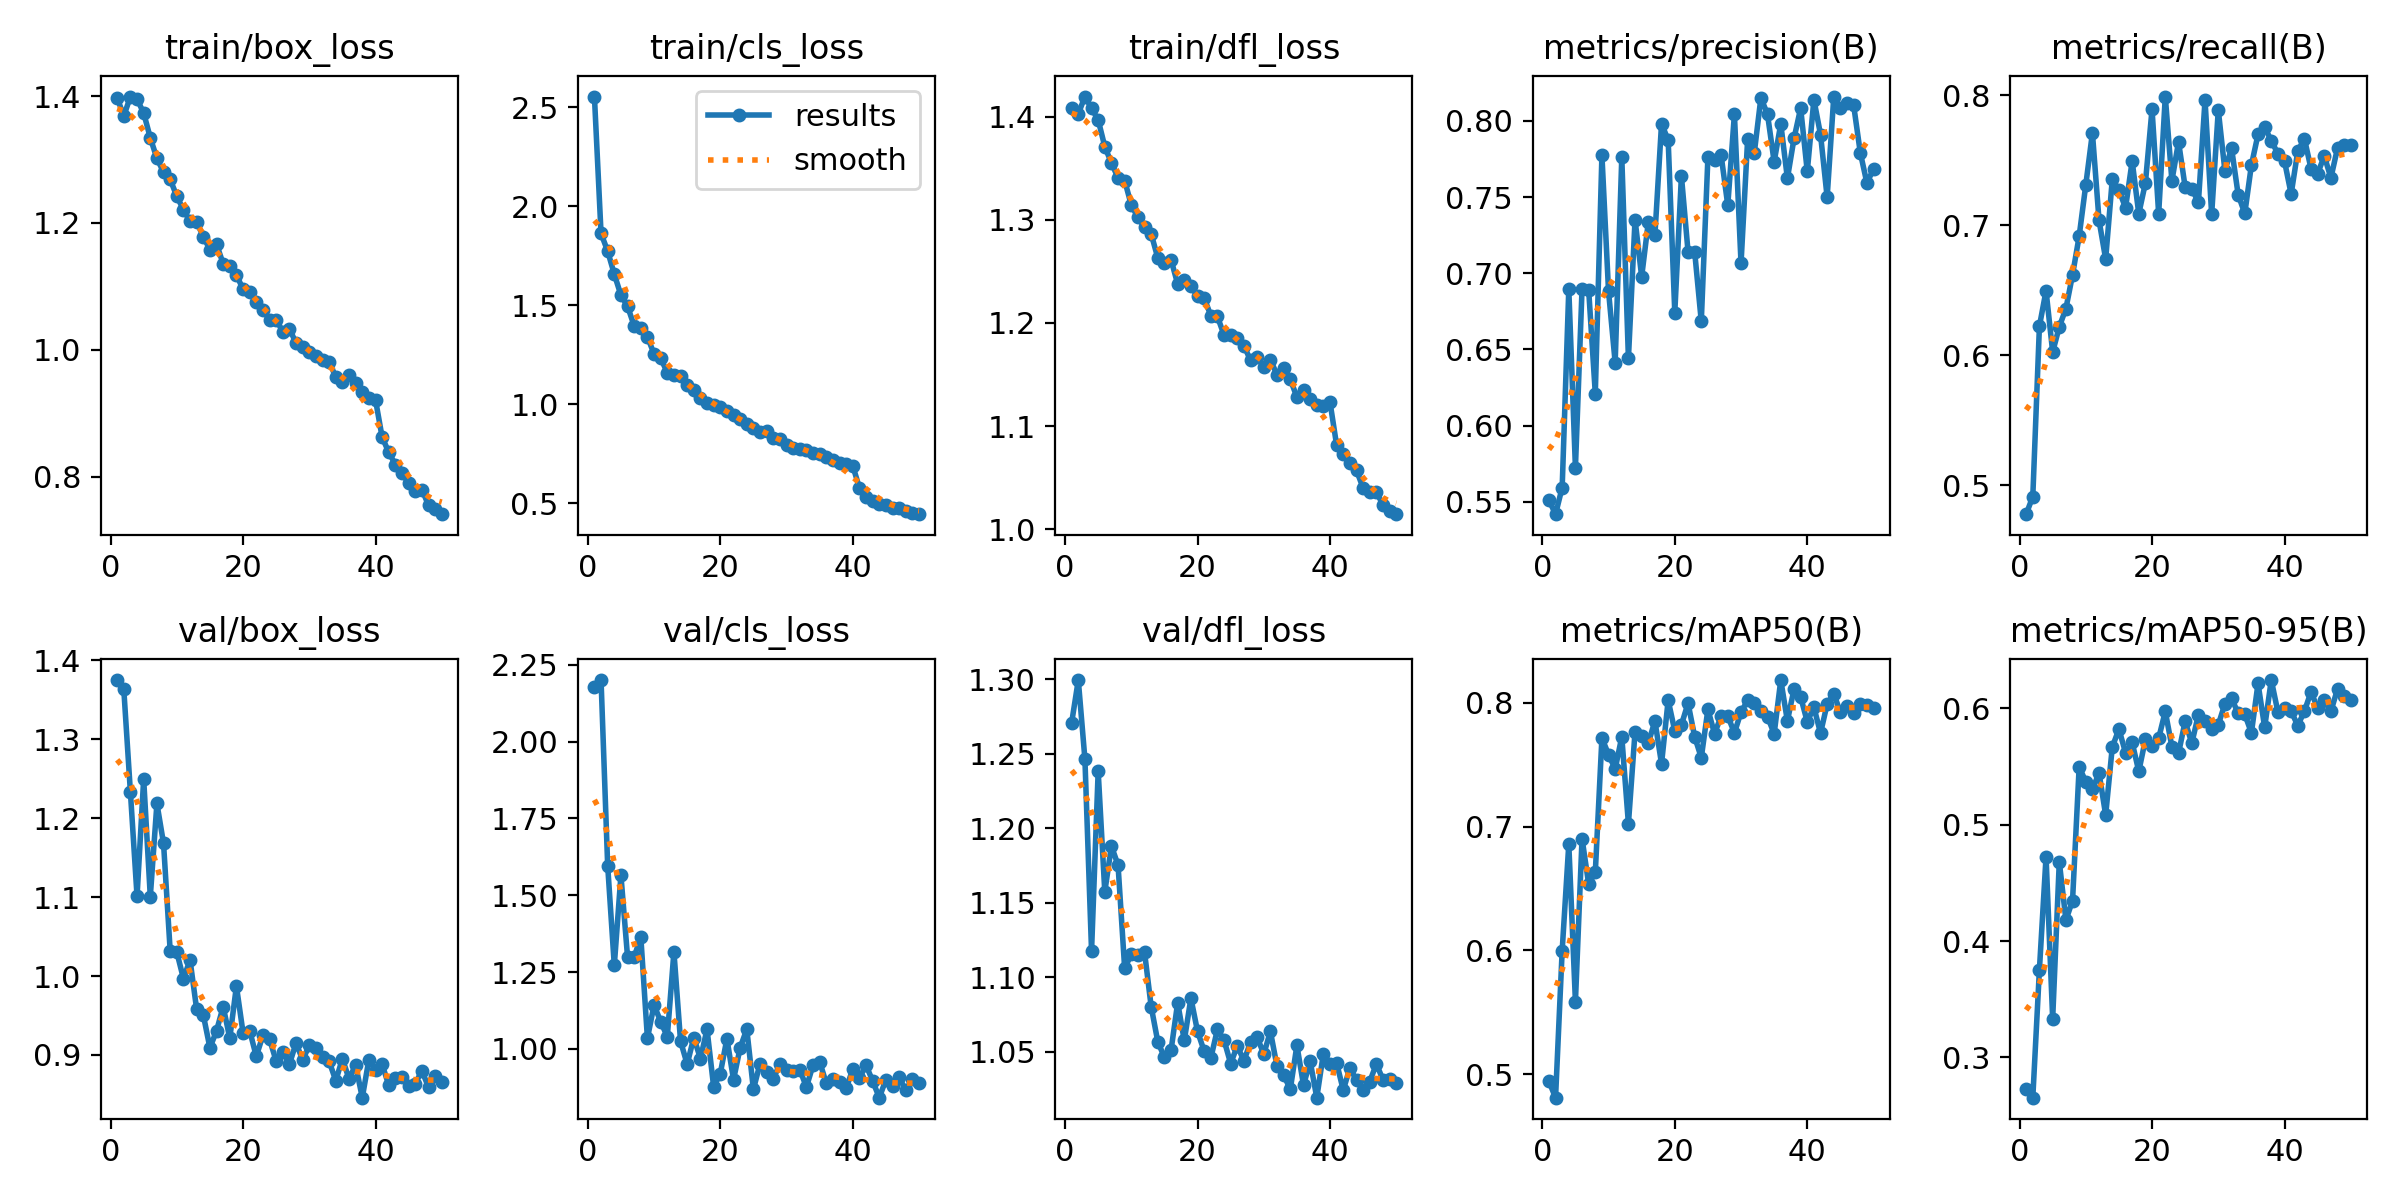

In [14]:
Image(filename='/content/EcoDetect/yolov8n_augmented_run/results.png', width=1024)

Saving IMG_20250713_224150.jpg to IMG_20250713_224150 (3).jpg

image 1/1 /content/IMG_20250713_224150 (3).jpg: 640x512 1 aluminum, 1 paper, 1 plastic, 9.6ms
Speed: 3.3ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/EcoDetect/predict_output/results


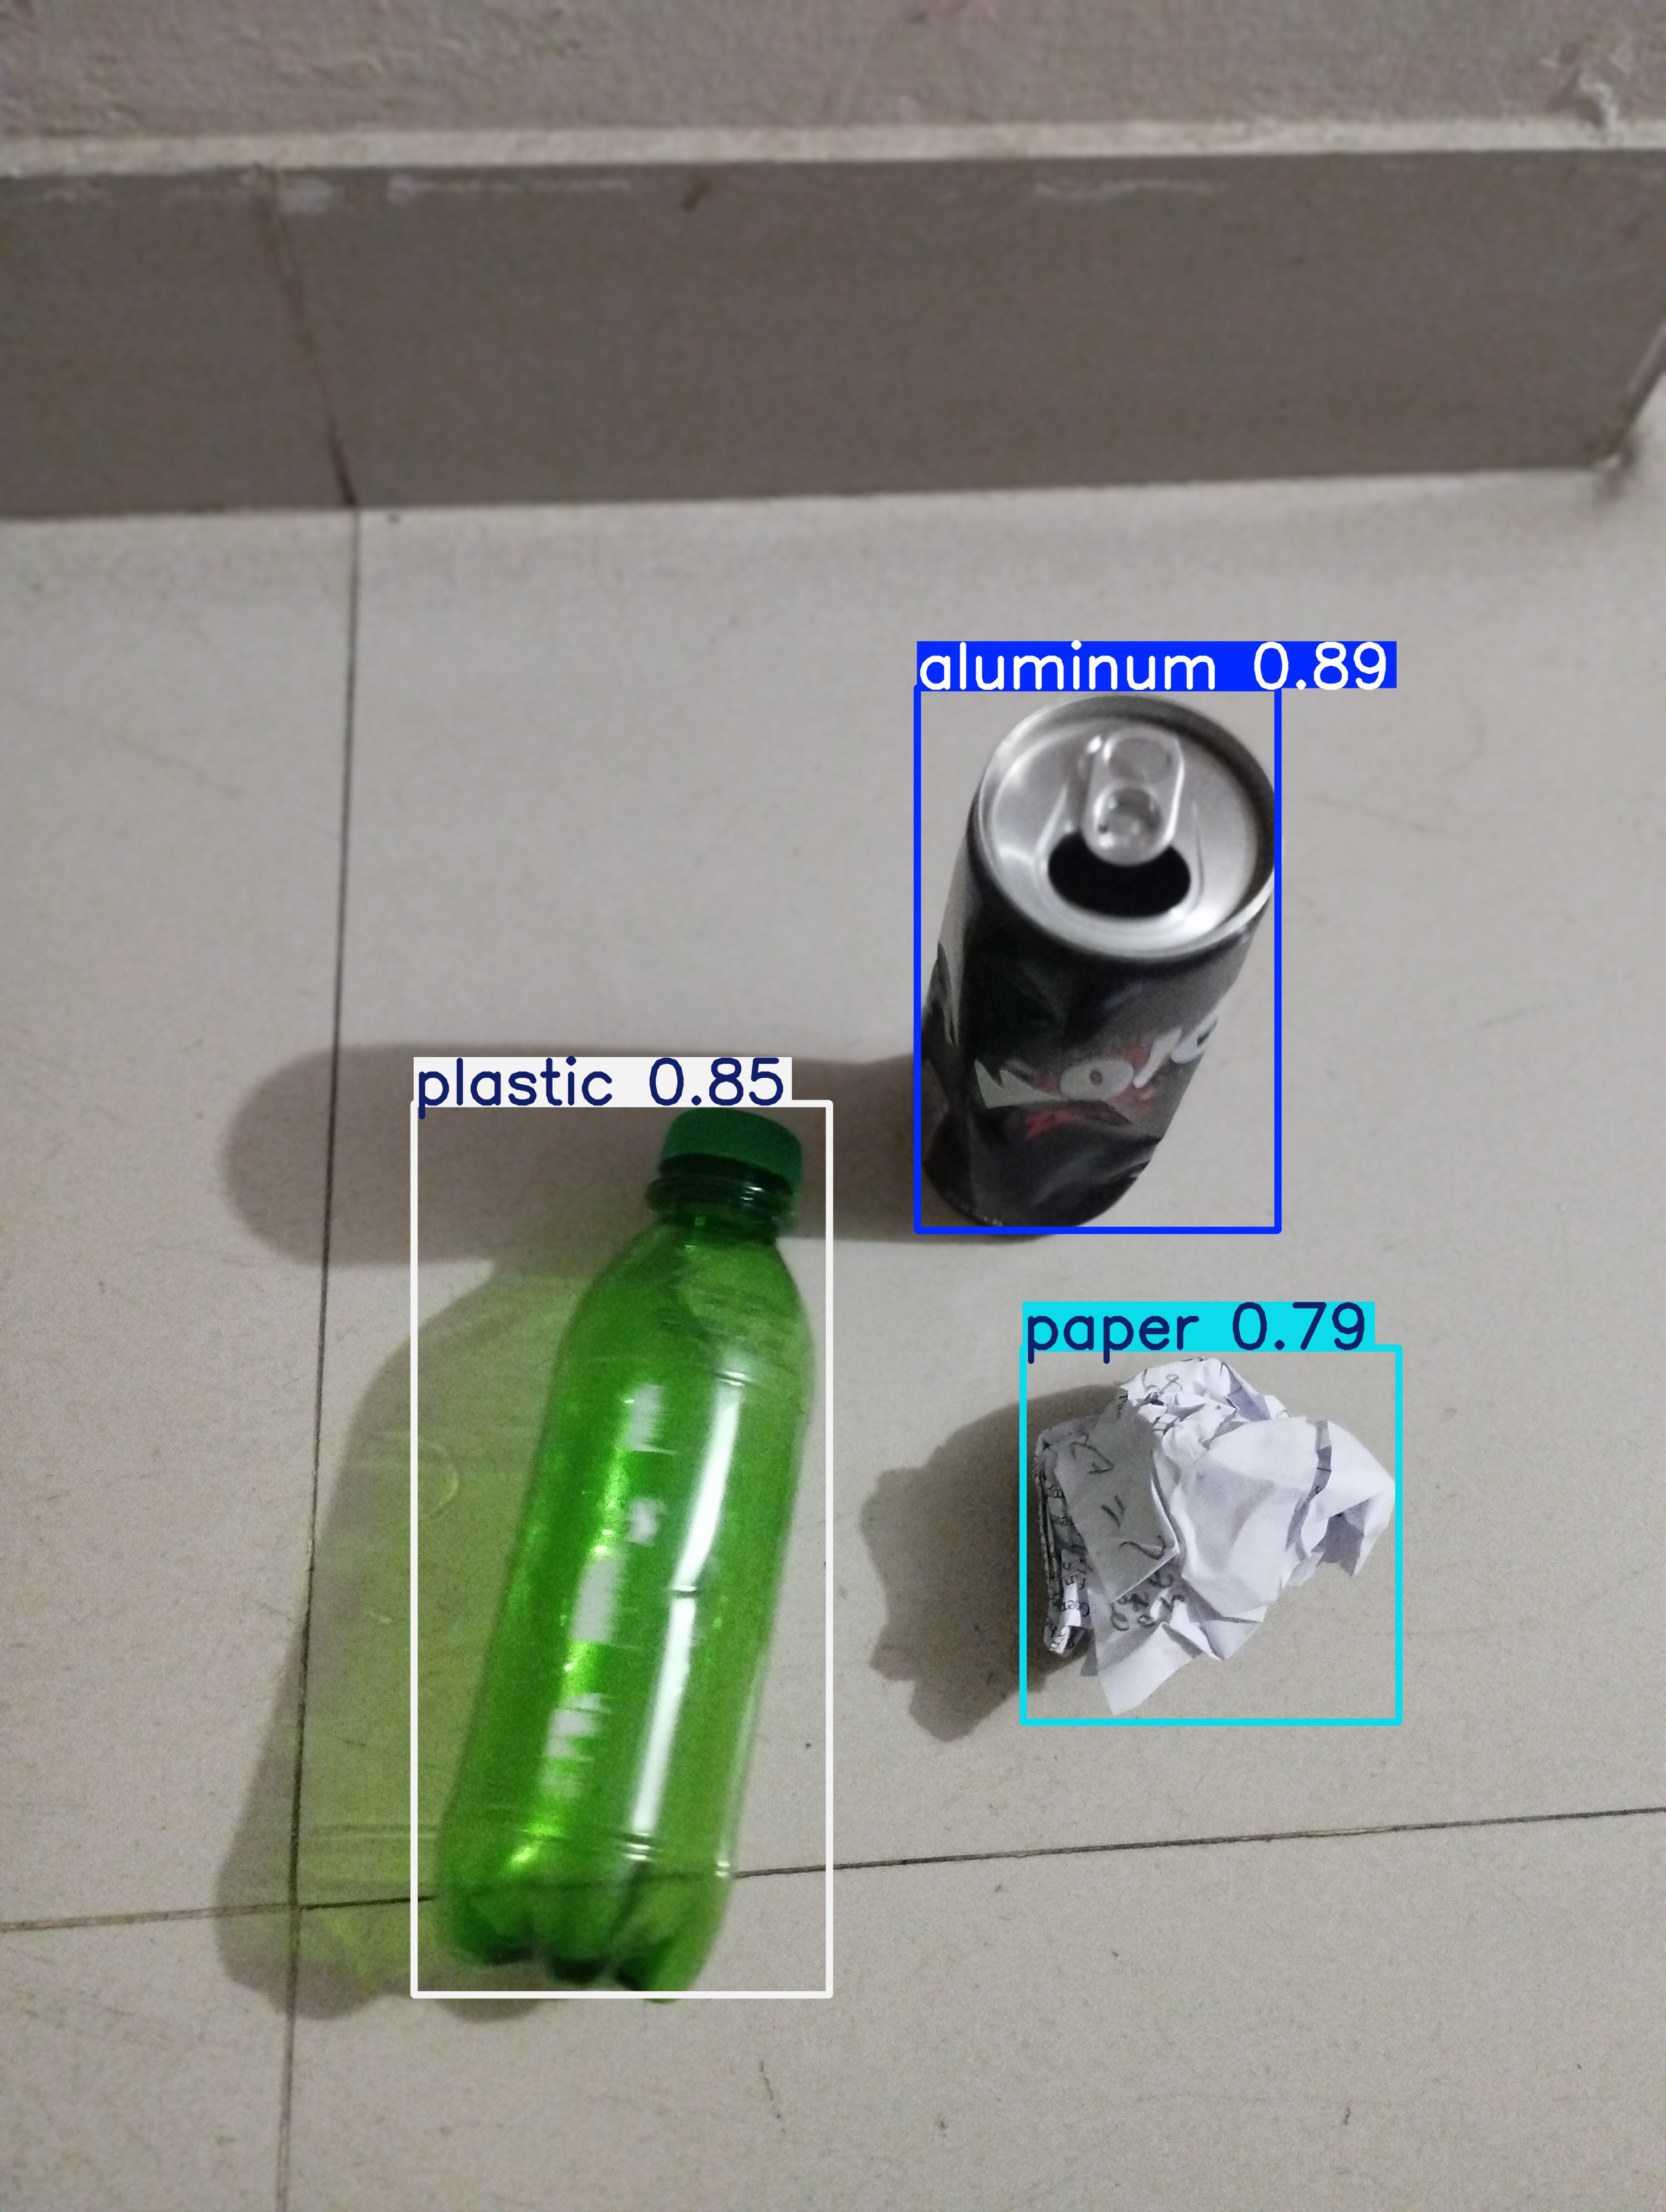

In [42]:
import glob
from datetime import datetime

uploaded = files.upload()
image_path = next(iter(uploaded))

model = YOLO("/content/EcoDetect/yolov8n_augmented_run/weights/best.pt")

predict_dir = "/content/EcoDetect/predict_output"
os.makedirs(predict_dir, exist_ok=True)

results = model.predict(source=image_path, save=True, save_txt=False, project=predict_dir, name='results', exist_ok=True)

output_images = glob.glob(f"{predict_dir}/results/*")
if output_images:
    display(Image(filename=output_images[0], width=600, height=600))
else:
    print("⚠️ No output image found.")
